In [11]:
import pandas as pd

# CPNR değerleri için amino asitler
aminos_asit = {
    'M': 1, 'W': 2, 'F': 3, 'Y': 5, 'P': 7,
    'C': 11, 'T': 13, 'H': 17, 'V': 19, 'L': 23,
    'Q': 29, 'S': 31, 'A': 37, 'N': 41, 'G': 43,
    'R': 47, 'I': 53, 'D': 59, 'E': 61, 'K': 67, "*": 0
}

def hesapla_amino_asit_degerleri(sequence, aminos_asit_degerleri):
    sayisallar= [aminos_asit.get(aa, 0) for aa in sequence]
    return sayisallar

# Excel dosyasını okuma
exceldosya = "/content/PSSP.xlsx"
veri = pd.read_excel(exceldosya)

# Protein dizilerinin çıkarılması ve sınıflandırma
protein_dizileri = veri['Seq'].apply(str).tolist()  # Tüm dizileri stringe dönüştür
siniflandirma = veri['Sınıflar'].tolist()

# Amino asit değerleri hesaplayarak protein dizilerini işleme
sayisaliste= [hesapla_amino_asit_degerleri(seq, aminos_asit) for seq in protein_dizileri]

# Sayısal değerleri DataFrame'e dönüştürme
verisayisal = pd.DataFrame(sayisaliste)

# DataFrame'e 'Sınıflandırma' sütununun eklenmesi
verisayisal['Sınıflar'] = siniflandirma

# Excel'e yazdırma
cikti_excel_dosyasi = "CPNRSAYİ.xlsx"
verisayisal.to_excel(cikti_excel_dosyasi, index=False)
print(f" '{cikti_excel_dosyasi}' PSSP Excel dosyasına kaydedildi.")

 'CPNRSAYİ.xlsx' PSSP Excel dosyasına kaydedildi.


Epoch 1/10
60/60 [==============================] - 5s 58ms/step - loss: nan - accuracy: 0.2276
Epoch 2/10
60/60 [==============================] - 3s 47ms/step - loss: nan - accuracy: 0.2276
Epoch 3/10
60/60 [==============================] - 2s 41ms/step - loss: nan - accuracy: 0.2276
Epoch 4/10
60/60 [==============================] - 2s 41ms/step - loss: nan - accuracy: 0.2276
Epoch 5/10
60/60 [==============================] - 2s 42ms/step - loss: nan - accuracy: 0.2276
Epoch 6/10
60/60 [==============================] - 3s 57ms/step - loss: nan - accuracy: 0.2276
Epoch 7/10
60/60 [==============================] - 3s 56ms/step - loss: nan - accuracy: 0.2276
Epoch 8/10
60/60 [==============================] - 2s 41ms/step - loss: nan - accuracy: 0.2276
Epoch 9/10
60/60 [==============================] - 2s 40ms/step - loss: nan - accuracy: 0.2276
Epoch 10/10
15/15 [==============================] - 1s 22ms/step
Tahmin edilen benzersiz sınıflar: [0]
Test etiketlerindeki benzersiz s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


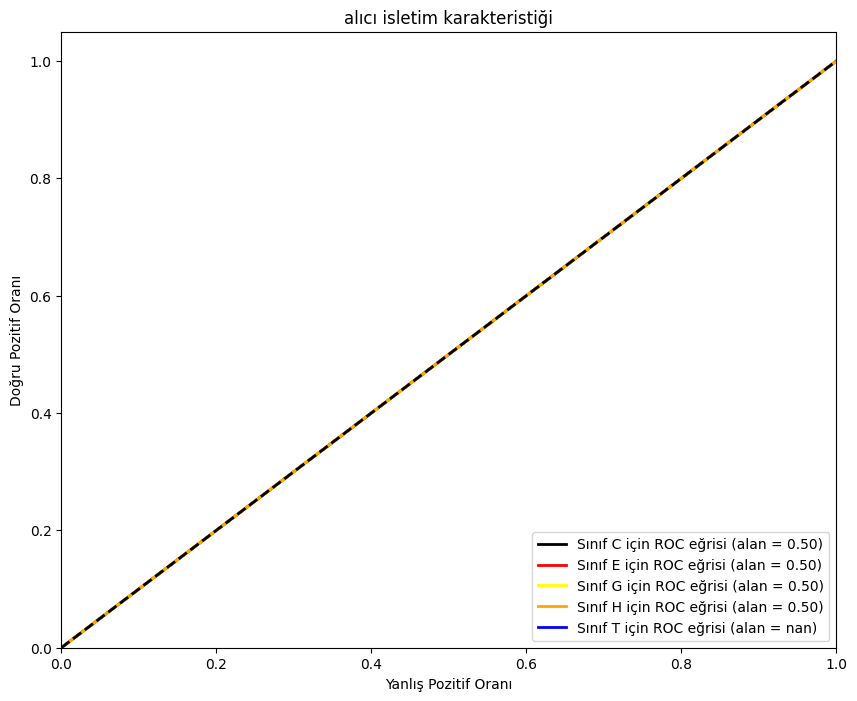

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Excel dosyasını okuma
veri = pd.read_excel('/content/CPNRSAYİ.xlsx')

# Sınıf sayısının belirlenmesi
label_encoder = LabelEncoder().fit(veri['Sınıflar'])
labels = label_encoder.transform(veri['Sınıflar'])
classes = list(label_encoder.classes_)

# Eğitim verisinin hazırlanması
# Sınıfları ayrı bir değişkene atama ve 'Class' sütununu kaldırma
X = veri.drop(['Sınıflar'], axis=1)
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
y = to_categorical(labels)

# Veri setini eğitim ve test seti olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)  # X_scaled kullanıldı

# LSTM modelini oluşturma
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(len(classes), activation='softmax'))

# Modeli derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # sparse_categorical_crossentropy yerine categorical_crossentropy kullanıldı

# Modeli eğitme
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Tahmin yapma
y_pred = model.predict(X_test)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Modeli değerlendirmek
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Tahminlerde ve test etiketlerinde benzersiz sınıfları kontrol etme
unique_pred_classes = np.unique(y_pred_classes)
unique_test_classes = np.unique(y_test_classes)
print(f"Tahmin edilen benzersiz sınıflar: {unique_pred_classes}")
print(f"Test etiketlerindeki benzersiz sınıflar: {unique_test_classes}")

# Tahminlerde ve test etiketlerinde benzersiz sınıfları kontrol etme
unique_pred_classes = np.unique(y_pred_classes)
unique_test_classes = np.unique(y_test_classes)
all_unique_classes = np.unique(np.concatenate((unique_pred_classes, unique_test_classes)))

# Hedef isimlerini düzeltmek için sınıfların benzersiz kombinasyonlarını kullanın
actual_target_names = [classes[i] for i in all_unique_classes]

# Sınıflandırma raporu
print(classification_report(y_test_classes, y_pred_classes, target_names=actual_target_names, labels=all_unique_classes, zero_division=0))

accuracy = accuracy_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
precision = precision_score(y_test_classes, y_pred_classes, average='weighted', zero_division=0)
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')

# y_test'i tek vuruşlu kodlamadan sınıf indekslerine dönüştürme
y_test_indices = np.argmax(y_test, axis=1)

# Karışıklık matrisini hesaplaMA
conf_matrix = confusion_matrix(y_test_indices, y_pred_classes)

# Performans metriklerini yazdırma
print(f'Doğruluk: {accuracy}')
print(f'F1 Skor: {f1}')
print(f'Kesinlik: {precision}')
print(f'Duyarlılık: {recall}')
print("\nKarmaşıklık matrisi:\n", conf_matrix)



# y_pred içindeki NaN değerlerini varSayılan bir değerle değiştirme
y_pred[np.isnan(y_pred)] = 0

# ROC Eğrileri
n_classes = y_pred.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    # ROC eğrisi hesaplama
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# ROC eğrilerini çizme
plt.figure(figsize=(10, 8))
colors = ['black', 'red', 'yellow', 'orange', 'blue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Sınıf {classes[i]} için ROC eğrisi (alan = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.title('alıcı isletim karakteristiği')
plt.legend(loc="lower right")
plt.show()


Epoch 1/100
53/53 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.2321
Epoch 2/100
53/53 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2321
Epoch 3/100
53/53 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2321
Epoch 4/100
53/53 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2321
Epoch 5/100
53/53 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2321
Epoch 6/100
53/53 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2321
Epoch 7/100
53/53 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2321
Epoch 8/100
53/53 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2321
Epoch 9/100
53/53 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2321
Epoch 10/100
53/53 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2321
Epoch 11/100
53/53 [===================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


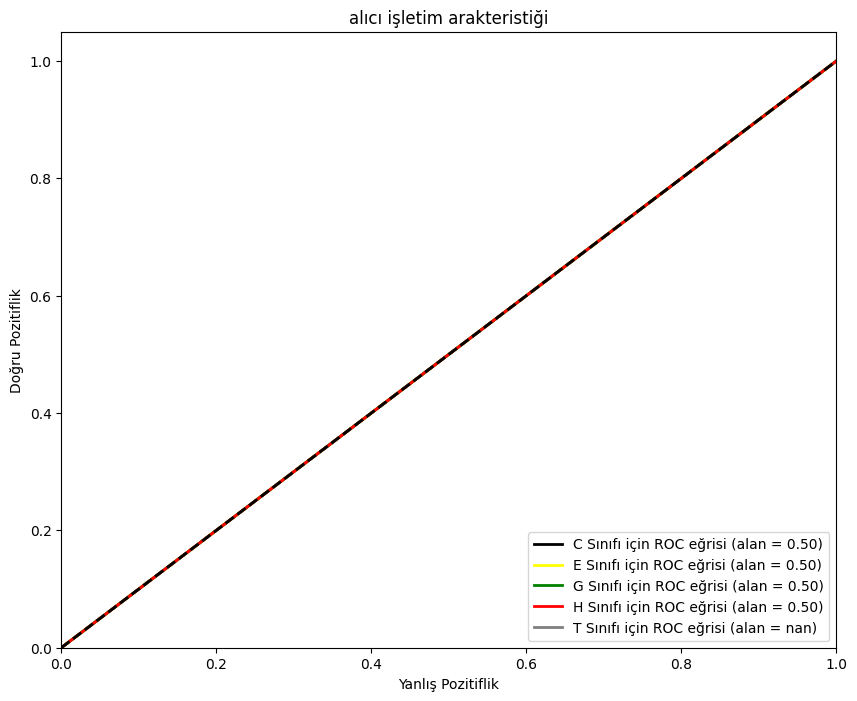

In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

veri = pd.read_excel('/content/CPNRSAYİ.xlsx')

etiketle= LabelEncoder().fit(veri['Sınıflar'])
etiketler = etiketle.transform(veri['Sınıflar'])
klaslar = list(etiketle.classes_)

X = veri.drop(['Sınıflar'], axis=1)
olcekle = StandardScaler().fit(X)
X_olcekli = olcekle.transform(X)
y = to_categorical(etiketler)

X_egitim, X_test, y_egitim, y_test = train_test_split(X_olcekli, y, test_size=0.3, random_state=42)

X_egitim = np.reshape(X_egitim, (X_egitim.shape[0], 1, X_egitim.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

n_siniflar = y.shape[1]

model = Sequential()
model.add(SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(1, X_egitim.shape[2])))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_egitim, y_egitim, epochs=100, batch_size=32, verbose=1)

y_tahmin = model.predict(X_test)
tahmin_siniflar = np.argmax(y_tahmin, axis=1)
gercek_siniflar = np.argmax(y_test, axis=1)

unique_pred_classes = np.unique(tahmin_siniflar)
unique_test_classes = np.unique(gercek_siniflar)
all_unique_classes = np.unique(np.concatenate((unique_pred_classes, unique_test_classes)))

class_names = [klaslar[i] for i in all_unique_classes]

print(classification_report(gercek_siniflar, tahmin_siniflar, target_names=class_names, labels=all_unique_classes, zero_division=0))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(gercek_siniflar, tahmin_siniflar)
f1 = f1_score(gercek_siniflar, tahmin_siniflar, average='weighted')
precision = precision_score(gercek_siniflar, tahmin_siniflar, average='weighted', zero_division=0)
recall = recall_score(gercek_siniflar, tahmin_siniflar, average='weighted')

gercek_sinif_indeksleri = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(gercek_sinif_indeksleri, tahmin_siniflar)

print(f'Doğruluk: {accuracy}')
print(f'F1 Skor: {f1}')
print(f'Kesinlik: {precision}')
print(f'Duyarlılık: {recall}')
print("Karmaşıklık matrisi:\n", conf_matrix)

y_tahmin[np.isnan(y_tahmin)] = 0

n_siniflar = y_tahmin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_siniflar):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_tahmin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = ['black', 'yellow', 'green', 'red', 'grey']
for i, color in zip(range(n_siniflar), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'{klaslar[i]} Sınıfı için ROC eğrisi (alan = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlış Pozitiflik')
plt.ylabel('Doğru Pozitiflik')
plt.title('alıcı işletim arakteristiği')
plt.legend(loc="lower right")
plt.show()

